# 4. Resistive two-ports (Resistive Zweitore)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from lcapy import Circuit

## Two-port (Zweitor)
* 4-terminal network in 4-dimensional space
* $u_1, i_1, u_2, i_2$ are inputs to the network
* Can be described as vectors:
$$
\overline{u} = \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}, \quad \overline{i} = \begin{pmatrix} i_1 \\ i_2 \end{pmatrix}
$$

### Resistance Matrix $R$
* Scenario: Connecting current sources to both ports
* What is the voltage across the ports?
* Mapping from current space to voltage space
$$
\overline{u} = R \overline{i} \\
$$
$$
\begin{pmatrix} u_1 \\ u_2 \end{pmatrix} = \begin{pmatrix} r_{11} & r_{12} \\ r_{21} & r_{22} \end{pmatrix} \begin{pmatrix} i_1 \\ i_2 \end{pmatrix}
$$
* $r_{i,j}$ is the resistance between node $i$ and node $j$
* $r_{1,1} = \frac{u_1}{i_1} |_{i_2 = 0}$ describes input resistance when output is open

### Conductance Matrix $G$
* Scenario: Connecting voltage sources to both ports (e.g. batteries)
* What is the current through the ports?
* Mapping from voltage space to current space
$$
\overline{i} = G \overline{u} \\
$$
$$
\begin{pmatrix} i_1 \\ i_2 \end{pmatrix} = \begin{pmatrix} g_{11} & g_{12} \\ g_{21} & g_{22} \end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}
$$
* $g_{i,j}$ is the conductance between node $i$ and node $j$
* $g_{1,1} = \frac{i_1}{u_1} |_{u_2 = 0}$ describes input conductance when output is short-circuited

### Hybrid Matrix $H$
* Scenario: Connecting current sources to one port and voltage sources to the other
    * Example: Bipolar Junction Transistor
    * Base current $i_1$ and collector-emitter voltage $u_2$ are controlled
* What is the base voltage $u_1$ and collector-emitter current $i_2$?
* Mapping from mixed space to mixed space
$$
\begin{pmatrix} u_1 \\ i_2 \end{pmatrix} = \begin{pmatrix} h_{11} & h_{12} \\ h_{21} & h_{22} \end{pmatrix} \begin{pmatrix} i_1 \\ u_2 \end{pmatrix}
$$
* $h_{1,1}$ is impedance ($\Omega$)
* $h_{2,2}$ is conductance ($S$)
* $h_{2,1}$ is current gain (Unitless)

### Chain Matrix $A$
* Scenario: Power plant connected to a transformer, connected to a transmission line, connected to a house
* Given the input conditions, what is the output?
* Mapping from input space to output space
$$
\begin{pmatrix} u_1 \\ i_1 \end{pmatrix} = A \begin{pmatrix} u_2 \\ -i_2 \end{pmatrix}
$$

### Inverse Chain Matrix $A'$
* Give the output conditions, what is the input?
* Mapping from output space to input space
$$
\begin{pmatrix} u_2 \\ i_2 \end{pmatrix} = A' \begin{pmatrix} u_1 \\ -i_1 \end{pmatrix}
$$



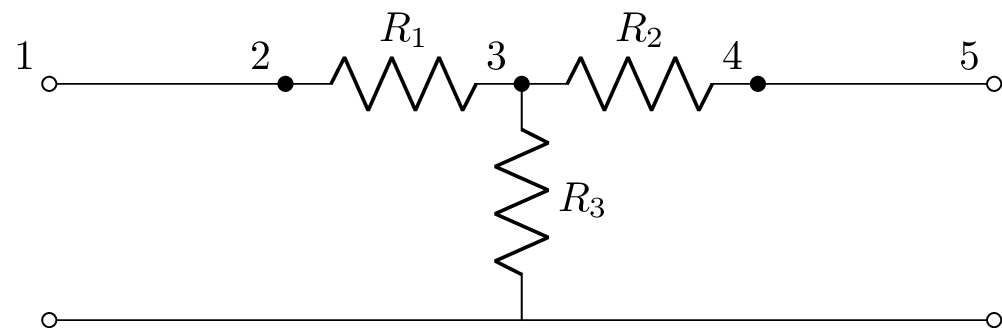

In [9]:
# Example network

cct = Circuit("""
P1 1 0_1; down
W 1 2; right
R1 2 3; right, l^=R_1
R3 3 0_3; down, l^=R_3
W 0_3 0_1; left
R2 3 4; right, l^=R_2
W 4 5; right
P2 5 0_5; down
W 0_5 0_3; left
""")

cct.draw()

In [16]:
Z = cct.Zparams('P1', 'P2')

print("The Resistance Matrix R:")
display(Z)

The Resistance Matrix R:


⎡R₁ + R₃    R₃   ⎤
⎢                ⎥
⎣  R₃     R₂ + R₃⎦

* $r_{11} = R_1 + R_3$ - if port 2 is open, current $i_1$ flows through $R_1$ and $R_3$ to ground.
* $r_{22} = R_2 + R_3$ - if port 1 is open, current $i_2$ flows through $R_2$ and $R_3$ to ground.
* $r_{12} = r_{21} = R_3$ - voltage at node 3 is created solely current flowing from port 1 or 2 to ground.

* Total instantaneous power can be calculated as:
$$
p = u_1 i_1 + u_2 i_2
$$
* In vector/matrix form:
$$
\overline{u}^T \overline{i} = \begin{pmatrix} u_1 & u_2 \end{pmatrix} \begin{pmatrix} i_1 \\ i_2 \end{pmatrix} = u_1 i_1 + u_2 i_2 = p
$$